In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   time_to_collect           1000 non-null   int64  
 2   avg_bill_methods          1000 non-null   object 
 3   debtor_volume_handled     1000 non-null   int64  
 4   bill_amount_collected     1000 non-null   int64  
 5   total_actual              1000 non-null   int64  
 6   total_cost                1000 non-null   int64  
 7   success_rate              1000 non-null   float64
 8   collector_age             1000 non-null   int64  
 9   collector_marital_status  1000 non-null   object 
 10  collector_gender          1000 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_age,collector_marital_status,collector_gender
0,0,sms or WA,7,14400000,35700000,277706,40.0,45,Menikah,laki-laki
1,11,panggilan,35,79000000,160500000,22382611,49.0,32,Cerai mati,perempuan
2,4,sms or WA,6,7100000,26700000,205389,27.0,62,Cerai hidup,laki-laki
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0,55,Cerai mati,perempuan
4,22,datang ke tempat,35,346000000,485500000,151035603,71.0,53,Menikah,perempuan


In [5]:
bill_methods = LabelEncoder().fit(df["avg_bill_methods"].to_numpy().reshape(-1, 1))
gender = LabelEncoder().fit(df["collector_gender"].to_numpy().reshape(-1, 1))
mart = LabelEncoder().fit(df["collector_marital_status"].to_numpy().reshape(-1, 1))
df2 = pd.DataFrame()

df2["avg_bill_methods"] = bill_methods.transform(df["avg_bill_methods"])
df2["collector_gender"] = gender.transform(df["collector_gender"])
df2["collector_marital_status"] = mart.transform(df["collector_marital_status"])
           
scaler = RobustScaler().fit(df[["bill_amount_collected", "total_actual", "total_cost"]])
df2[["bill_amount_collected", "total_actual", "total_cost"]] = scaler.transform(df[["bill_amount_collected", "total_actual", "total_cost"]])
df2[["time_to_collect", "debtor_volume_handled", "collector_age", "success_rate"]] = df[["time_to_collect", "debtor_volume_handled", "collector_age", "success_rate"]]
y = df2["total_cost"]

df2.head(5)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,avg_bill_methods,collector_gender,collector_marital_status,bill_amount_collected,total_actual,total_cost,time_to_collect,debtor_volume_handled,collector_age,success_rate
0,2,0,3,-0.459398,-0.520698,-0.252668,0,7,45,40.0
1,1,1,2,-0.282327,-0.344973,-0.162494,11,35,32,49.0
2,2,0,1,-0.479408,-0.533371,-0.252963,4,6,62,27.0
3,0,1,2,1.644624,1.393270,1.716301,29,63,55,56.0
4,0,1,3,0.449531,0.112644,0.362330,22,35,53,71.0


In [6]:
X = df2.drop("total_cost", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_train.shape

((800, 9), (200, 9), (800,), (800,))

In [7]:
model = BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 0.21
      Mean Absolute Error : 0.29
      Mean Absolute Percentage Error : 2.01
      Root Mean Squared Error : 2.01
      R_Squared : 0.59
      


In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 0.30
      Mean Absolute Error : 0.32
      Mean Absolute Percentage Error : 2.60
      Root Mean Squared Error : 2.60
      R_Squared : 0.41
      


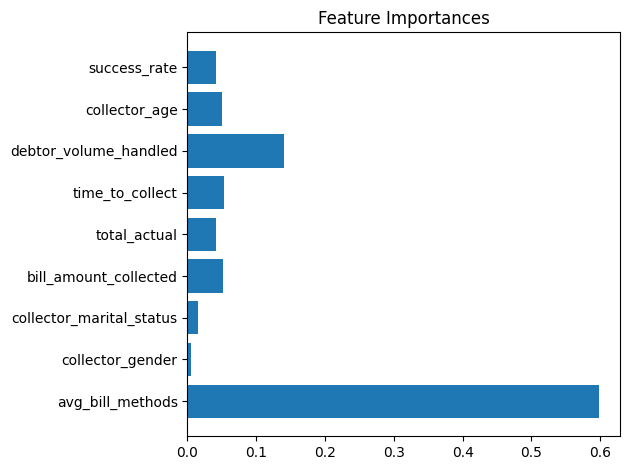

In [11]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [12]:
model = BaggingRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],    # Jumlah estimator (pohon) dalam ensemble
    'max_samples': [0.5, 0.7, 0.8, 1.0],  # Proporsi sampel yang digunakan dalam setiap estimator
    'max_features': [0.5, 0.7, 0.8, 1.0]  # Proporsi fitur yang digunakan dalam setiap estimator
}

# Inisiasi Grid Search dengan Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)

# Fit Grid Search ke data Anda
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_features': [0.5, 0.7, 0.8, 1.0],
                         'max_samples': [0.5, 0.7, 0.8, 1.0],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='r2')

In [13]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 0.16
      Mean Absolute Error : 0.26
      Mean Absolute Percentage Error : 1.84
      Root Mean Squared Error : 1.84
      R_Squared : 0.68
      


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 0.20
      Mean Absolute Error : 0.34
      Mean Absolute Percentage Error : 2.71
      Root Mean Squared Error : 2.71
      R_Squared : 0.61
      


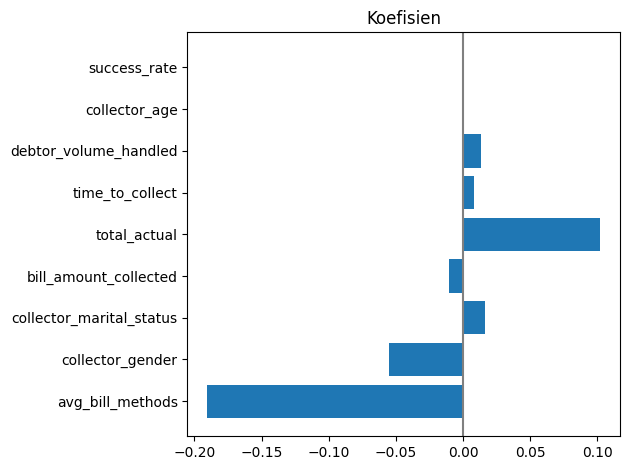

In [16]:
plt.barh(X_train.columns, model.coef_)
plt.title("Koefisien")
plt.axvline(x=0, color=".5")
plt.tight_layout()
plt.show()

In [17]:
n_samples = len(df)
n_features = len(df.columns)
params = {'base_estimator': [None, LinearRegression(), DecisionTreeRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0, n_samples//2,],
          'max_features': [0.5,1.0, n_features//2,],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=3, estimator=BaggingRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            DecisionTreeRegressor()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0, 5],
                         'max_samples': [0.5, 1.0, 500],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [18]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 0.20
      Mean Absolute Error : 0.34
      Mean Absolute Percentage Error : 2.71
      Root Mean Squared Error : 2.71
      R_Squared : 0.61
      
